# Initialize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = [14, 10]
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.utils import compute_class_weight

# Load Data

In [2]:
# Load the Data
wine_df = pd.read_csv('data/winequality-red.csv', delimiter=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Descriptive Analysis

In [3]:
# Check to see the datatypes of the columns and null values
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Statistical Definition of each feature
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Distribution Analysis

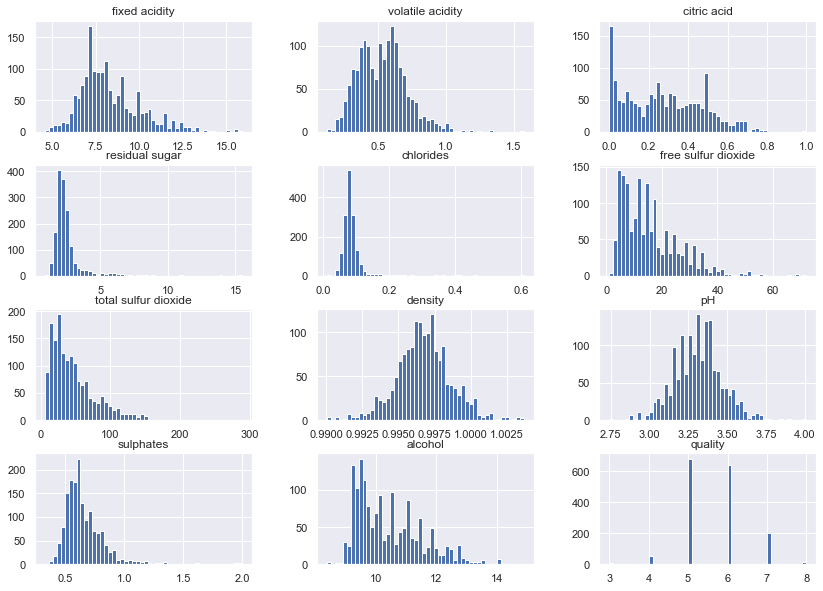

In [5]:
# Distribution analysis for each feature
wine_df.hist(bins=50)
plt.show()

# Correlation Analysis

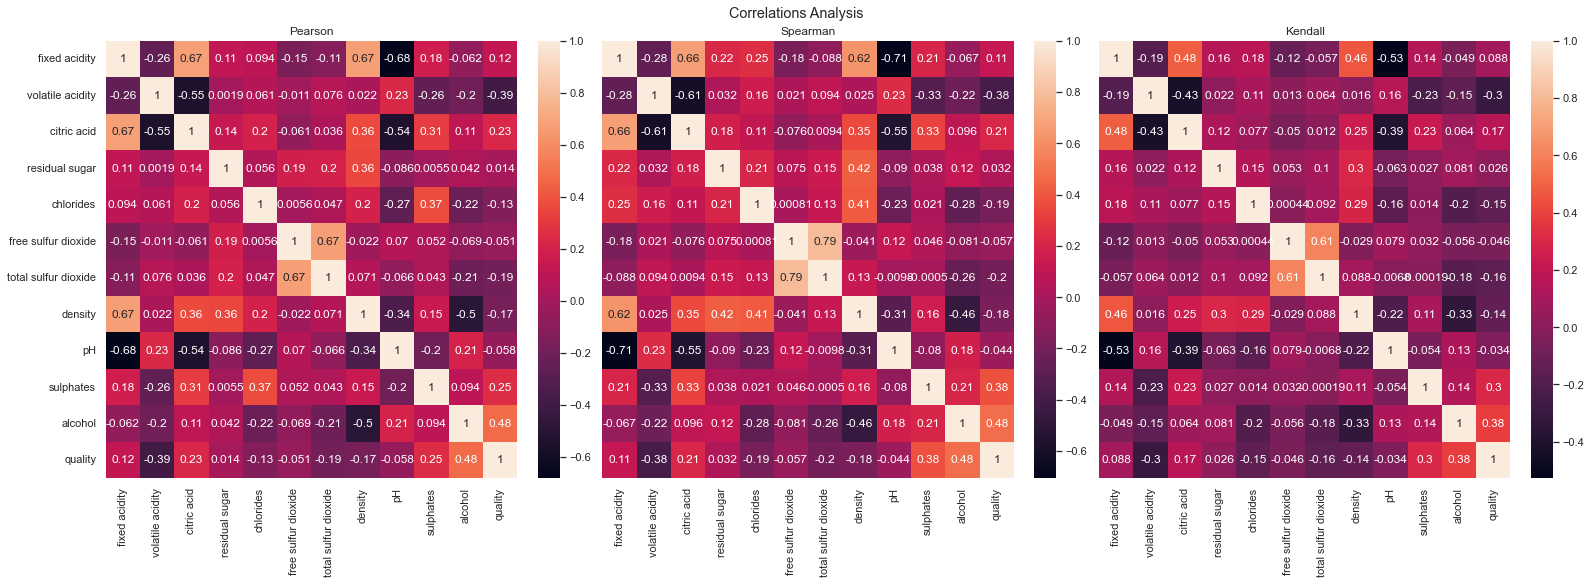

In [6]:
# Correlation Analysis
pearson_correlation = wine_df.corr(method="pearson")
spearman_correlation = wine_df.corr(method="spearman")
kendall_correlation = wine_df.corr(method="kendall")

# Plot
fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(22, 8), sharex=True, sharey=True)
sns.heatmap(pearson_correlation, annot=True, ax=axes[0], cbar=True)
axes[0].title.set_text("Pearson")
sns.heatmap(spearman_correlation, annot=True, ax=axes[1], cbar=True)
axes[1].title.set_text("Spearman")
sns.heatmap(kendall_correlation, annot=True, ax=axes[2], cbar=True)
axes[2].title.set_text("Kendall")

fig.suptitle("Correlations Analysis")
plt.show()

In [7]:
# Top ranked features
pearson_selected_names = set(pearson_correlation.quality.sort_values(ascending=False)[:5].index.values.tolist())
spearman_selected_names = set(spearman_correlation.quality.sort_values(ascending=False)[:5].index.values.tolist())
kendall_selected_names = set(kendall_correlation.quality.sort_values(ascending=False)[:5].index.values.tolist())

# Unique features
unique_features = set.intersection(pearson_selected_names, spearman_selected_names, kendall_selected_names)
print(f"Unique Features: {unique_features}")

Unique Features: {'quality', 'alcohol', 'sulphates', 'fixed acidity', 'citric acid'}


In [8]:
# Get features and targets
features_df = wine_df[unique_features].drop("quality", axis=1)
targets_df = wine_df[unique_features].quality.to_frame()

# Dimensionality Reduction

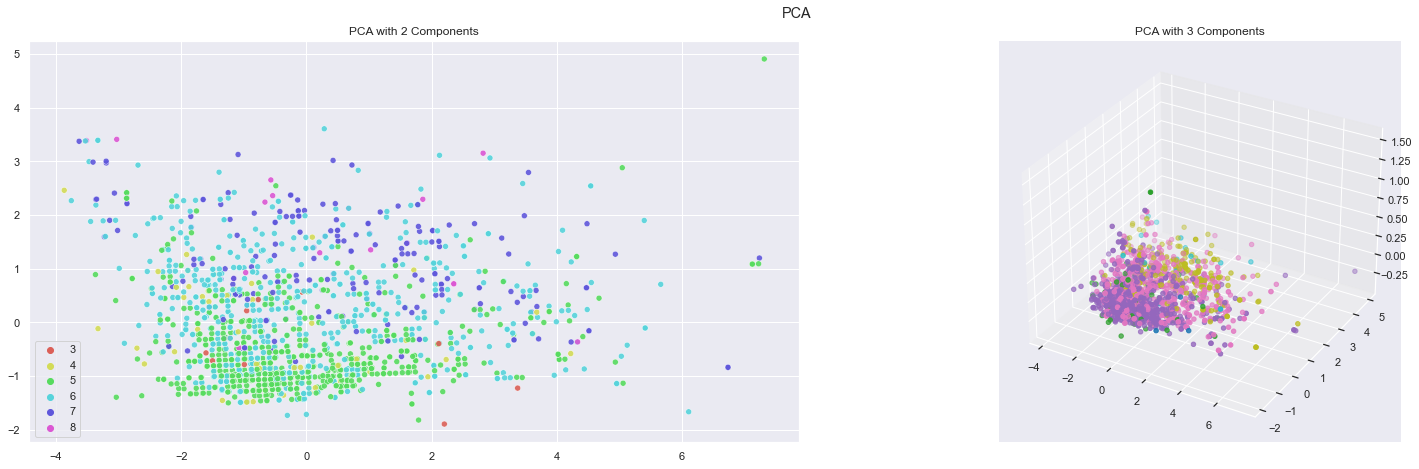

In [9]:
# Dimensionality Reduction
pca2D = PCA(n_components=2).fit_transform(features_df.values)
pca3D = PCA(n_components=3).fit_transform(features_df.values)

fig = plt.figure(figsize=(22, 12), constrained_layout=True)
fig.suptitle("PCA")

# PCA with 2 Components
ax = fig.add_subplot(2, 2, 1)
ax.title.set_text("PCA with 2 Components")
sns.scatterplot(
    x=pca2D[:, 0], y=pca2D[:, 1],
    hue=np.squeeze(targets_df.values),
    palette=sns.color_palette("hls", 6),
    legend="full",
    alpha=0.9,
    ax=ax
)

# PCA with 3 Components
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.title.set_text("PCA with 3 Components")
ax.scatter(
    xs=pca3D[:, 0], 
    ys=pca3D[:, 1], 
    zs=pca3D[:, 2], 
    c=np.squeeze(targets_df.values), 
    cmap='tab10',
)
plt.show()

# Normalization and Splits

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features_df.values, np.squeeze(targets_df.values), test_size=0.2, shuffle=True)

# Encode the Labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Scale the data
features_scaler = MinMaxScaler()
features_scaler.fit(X_train)
X_train = features_scaler.transform(X_train)
X_test = features_scaler.transform(X_test)

# Random Forest


----------Training Random Forest----------

Accuracy Score         :       0.61
f1 Score               :       0.61
Precision Score        :       0.61
Recall Score           :       0.61



/Users/ibtihajtahir/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


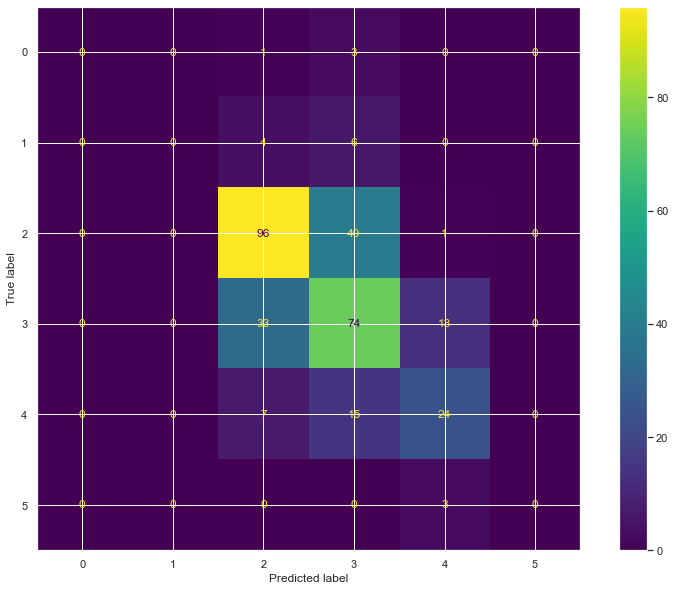

In [11]:
classifier = RandomForestClassifier(n_estimators=500, class_weight="balanced", n_jobs=-1)
print()
print("----------Training Random Forest----------")
print()
classifier.fit(X_train, y_train)

# Prediction of Testset
y_pred = classifier.predict(X_test)

# Confusion Matrix
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="micro")
ps = precision_score(y_test, y_pred, average="micro")
rs = recall_score(y_test, y_pred, average="micro")
cm = confusion_matrix(y_test, y_pred)

print('{:<23}: {:>10.2f}'.format('Accuracy Score', acc_score), sep='')
print('{:<23}: {:>10.2f}'.format('f1 Score', f1), sep='')
print('{:<23}: {:>10.2f}'.format('Precision Score', ps), sep='')
print('{:<23}: {:>10.2f}'.format('Recall Score', rs), sep='')
print()

plot_confusion_matrix(classifier, X_test, y_test)
plt.show()